# Applying Long Short-Term Memory (LSTM) networks to Virtual Flow Metering (VFM)

## Author: Ridha Alkhabaz

### Imports:

In [124]:
os.chdir('/Users/ridhaalkhabaz/Documents/GitHub/VFM_ML/src')
from preprocessing import read_data_slugging, read_data_well
from configuration import configure 
os.chdir('/Users/ridhaalkhabaz/Documents/GitHub/VFM_ML')
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from itertools import islice
from pathlib import Path
from gluonts.model.deepar import DeepAREstimator
from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

#### The Slugging data set:

In [310]:
data_riser,headers, _= read_data_slugging('riser_pq_uni.csv', plot_data=False)
df_riser = pd.DataFrame.from_dict(dict(zip(['ds', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7','gas', 'liquid' ], data_riser.T)))
df_riser['date'] = df_riser['ds'].apply(time_to_timestamp)
df_riser = df_riser.set_index('date')
df_riser = df_riser.drop(['ds'], axis=1)
target_gas = np.array(df_riser['gas'])
target_liquid = np.array(df_riser['liquid'])
p1 = np.array(df_riser['p1'])
p2 = np.array(df_riser['p2'])
p3 = np.array(df_riser['p3'])
p4 = np.array(df_riser['p4'])
p5 = np.array(df_riser['p5'])
p6 = np.array(df_riser['p6'])
p7 = np.array(df_riser['p7'])

In [311]:
df_riser

,p1,p2,p3,p4,p5,p6,p7,gas,liquid
date,,,,,,,,,
2021-07-10 00:00:00,0.904939,0.881934,0.721893,0.526299,0.337001,0.155666,0.016581,0.210728,0.365316
2021-07-10 00:01:00,0.907502,0.889475,0.732448,0.536326,0.346176,0.163545,0.025615,0.192040,0.289380
2021-07-10 00:02:00,0.903671,0.883730,0.728871,0.532214,0.341866,0.159461,0.020827,0.219544,0.354832
2021-07-10 00:03:00,0.900143,0.880012,0.727829,0.531686,0.341796,0.159701,0.021207,0.237477,0.382744
2021-07-10 00:04:00,0.897756,0.877927,0.727519,0.531482,0.341613,0.159602,0.021137,0.247850,0.398670
...,...,...,...,...,...,...,...,...,...
2021-07-12 01:56:00,0.806160,0.784456,0.614275,0.404809,0.200553,0.014812,0.003875,0.179354,0.279759
2021-07-12 01:57:00,0.808061,0.786358,0.616164,0.406668,0.202369,0.015646,0.003913,0.179351,0.279714
2021-07-12 01:58:00,0.809965,0.788271,0.618062,0.408552,0.204211,0.016624,0.004025,0.179258,0.279125


In [306]:
def time_to_timestamp(seconds):
    addition = 1625893200
    minutes = seconds * 60 
    minutes += addition
    timestamp = datetime.datetime.fromtimestamp(minutes)
    return timestamp.strftime('%Y-%m-%d %H:%M:%S')

In [312]:
training_data_uni = ListDataset(
    [{"start":df_riser.index[0], "target":df_riser.gas[:2100]}],
    freq = "1min"
)

In [314]:
model = DeepAREstimator(freq='1min', context_length=100, prediction_length= 5,trainer= Trainer(epochs=30))
                

In [315]:
predictor = model.train(training_data_uni)





100%|██████████| 50/50 [00:07<00:00,  6.93it/s, epoch=1/30, avg_epoch_loss=-1.24]




100%|██████████| 50/50 [00:06<00:00,  7.49it/s, epoch=2/30, avg_epoch_loss=-2.52]




100%|██████████| 50/50 [00:06<00:00,  7.75it/s, epoch=3/30, avg_epoch_loss=-2.95]




100%|██████████| 50/50 [00:06<00:00,  7.73it/s, epoch=4/30, avg_epoch_loss=-3.14]




100%|██████████| 50/50 [00:06<00:00,  7.90it/s, epoch=5/30, avg_epoch_loss=-2.98]




100%|██████████| 50/50 [00:06<00:00,  7.86it/s, epoch=6/30, avg_epoch_loss=-3.22]




100%|██████████| 50/50 [00:06<00:00,  7.34it/s, epoch=7/30, avg_epoch_loss=-3.58]




100%|██████████| 50/50 [00:06<00:00,  7.90it/s, epoch=8/30, avg_epoch_loss=-3.39]




100%|██████████| 50/50 [00:06<00:00,  7.61it/s, epoch=9/30, avg_epoch_loss=-3.74]




100%|██████████| 50/50 [00:06<00:00,  7.89it/s, epoch=10/30, avg_epoch_loss=-3.77]




100%|██████████| 50/50 [00:06<00:00,  7.89it/s, epoch=11/30, avg_epoch_loss=-3.78]




100%|██████████| 50/50 [00:06<00:00,  7.74it/s, 

In [317]:
test_data = ListDataset(
    [{"start": df_riser.index[0], "target": df_riser.gas[2100:]}],
    freq = "1min"
)

In [326]:
[{"start": df_riser.index[0], "target": df_riser.gas[2100:]}]

[{'start': '2021-07-10 00:00:00', 'target': date
  2021-07-11 11:00:00    0.178108
  2021-07-11 11:01:00    0.177002
  2021-07-11 11:02:00    0.177643
  2021-07-11 11:03:00    0.177943
  2021-07-11 11:04:00    0.178676
                           ...   
  2021-07-12 01:56:00    0.179354
  2021-07-12 01:57:00    0.179351
  2021-07-12 01:58:00    0.179258
  2021-07-12 01:59:00    0.179147
  2021-07-12 02:00:00    0.179129
  Name: gas, Length: 901, dtype: float64}]

In [332]:
forecast_it, test_it = make_evaluation_predictions(
    dataset=test_data,
    predictor=predictor, 
    num_samples=100000
)

In [333]:
forecasts = list(forecast_it)

In [335]:
tss = list(test_it)

In [322]:
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metric, item_metrics= evaluator(iter(tss), iter(forecasts), num_series=len(test_data))





Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]A


In [323]:
agg_metric

{'MSE': 1.1266083311056718e-05,
 'abs_error': 0.016292020678520203,
 'abs_target_sum': 0.896239161491394,
 'abs_target_mean': 0.17924783229827881,
 'seasonal_error': 0.007057796776627695,
 'MASE': 0.4616744061680035,
 'MAPE': 0.018178895115852356,
 'sMAPE': 0.01835739314556122,
 'MSIS': 1.2415566698024383,
 'QuantileLoss[0.1]': 0.005716675519943237,
 'Coverage[0.1]': 0.0,
 'QuantileLoss[0.5]': 0.016292020678520203,
 'Coverage[0.5]': 0.0,
 'QuantileLoss[0.9]': 0.006790658831596375,
 'Coverage[0.9]': 0.4,
 'RMSE': 0.003356498668412773,
 'NRMSE': 0.018725463094177698,
 'ND': 0.018178206642308882,
 'wQuantileLoss[0.1]': 0.006378515652485389,
 'wQuantileLoss[0.5]': 0.018178206642308882,
 'wQuantileLoss[0.9]': 0.0075768378836474,
 'mean_absolute_QuantileLoss': 0.009599785010019938,
 'mean_wQuantileLoss': 0.010711186726147223,
 'MAE_Coverage': 0.3666666666666667,
 'OWA': nan}

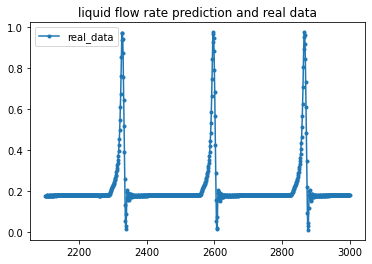

In [166]:
start_ploting = 2100
end_ploting = len(df_riser)
fig,ax = plt.subplots()
ax.set_title('liquid flow rate prediction and real data')
ax.plot(df_riser['ds'].iloc[start_ploting:end_ploting], df_riser['gas'].iloc[start_ploting:end_ploting], marker=".", label='real_data')
ax.legend(loc='upper left')

In [279]:

x_0 = forecasts[0].start_date.to_pydatetime()
base_date = datetime.datetime.combine(x_0.date(), datetime.datetime.min.time())
print(x_0 + datetime.timedelta(minutes=900) - base_date)
x_unit = 1  # 1 minute
x_ticks = np.linspace(0, len(forecasts[0].samples)-1, 10, dtype=int)
x_axis = [((datetime.datetime.min + (x_0 + datetime.timedelta(minutes=int(n) * x_unit) - base_date))).strftime('%H:%M:%S') for n in x_ticks]
x_axis[-1]

1 day, 5:56:00


'05:55:00'

In [263]:
forecasts[0].start_date

Timestamp('2021-07-12 15:00:00', freq='T')

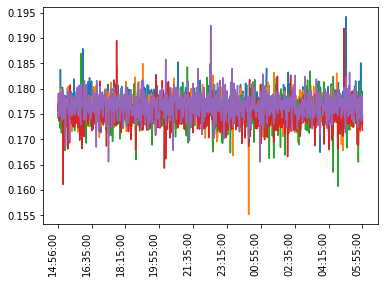

In [324]:
plt.plot(forecasts[0].samples)
ax = plt.gca()
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_axis)
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [341]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 900
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

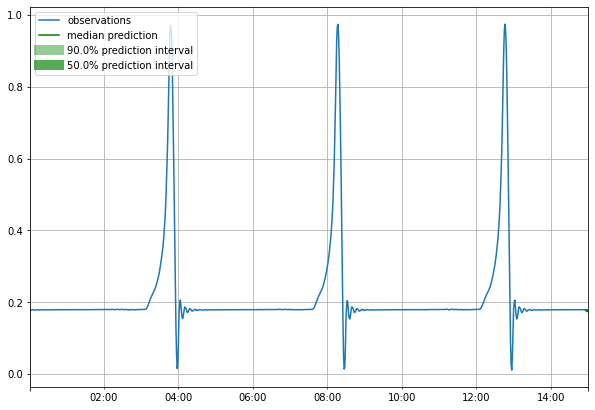

In [342]:
plot_prob_forecasts(tss[0], forecasts[0])